# Exploratory Data Analysis: Correlation between Real Estate Prices and Bankruptcies in Germany

### Hypothesis

I expected to find a negative correlation between real estate prices and bankruptcies: when bankruptcy numbers rise in the wake of a crisis, less capital is available to purchase homes, so demand declines and prices stagnate or fall. Conversely, when bankruptcy numbers are low (indicating economic stability), real estate prices tend to rise.

### Data Sources

The main source was destatis.de, Germany’s official statistical database.
	•	Bankruptcies: one consistent dataset spanning 1990–2024.
	•	Real estate prices: multiple datasets, each with different base years. This is a limitation, as indices were repeatedly reset to a new reference year.

Data formats used: CSV, PDF, Excel.

### Data Preparation

The most challenging dataset was the real estate index from 2000–2006, which was only available as a PDF in quarterly format.
	•	Extracted with Camelot.
	•	Cleaned with regex to remove text and NaNs.
	•	Filtered for yearly averages (removing quarterly duplicates such as multiple “4. VJ” entries).

The later datasets (2008–2024) were more straightforward and provided annual or quarterly values. Bankruptcy data was filtered to the relevant periods: 2000–2005, 2008–2013, 2020–2024.

Data manipulation and cleaning were done with Pandas; visualizations were created with Matplotlib.

### Method

Three plots were created to visualize developments during major crises:
- DotCom bubble (2000–2005)
- Financial crisis (2008–2013)
- COVID-19 pandemic (2020–2024)

For each, I merged the housing price index with bankruptcy numbers on the yearly level.
- X-axis: time (years)
- Y-axis (left): housing price index
- Y-axis (right): bankruptcies

This setup highlights possible correlations over time.

### Results

- DotCom bubble & Financial crisis: clear negative correlation — as bankruptcies rose, real estate prices stagnated or fell.
- COVID-19 pandemic: an outlier. A positive correlation appeared, with both prices and bankruptcies rising after 2020. This can be explained by the Corona-Soforthilfe (government grants), which temporarily reduced bankruptcies in 2020 but was followed by a sharp correction in 2021. Unlike earlier crises, real estate prices continued to increase despite economic disruptions.

### Limitations
- This project was a practice in data analysis with Python, not a polished academic study.
- Housing price indices across different datasets used different base years, preventing seamless long-term comparisons.
- Broader macroeconomic factors (interest rates, fiscal policy, labor market conditions) were ignored.
- The DotCom and Financial crises primarily hit financial markets, while COVID-19 was unique in that stock markets surged despite global supply chain disruptions.

### Next Steps

A natural extension would be to:
- Re-index all housing price datasets to a common base year.
- Incorporate additional variables such as interest rates and stock market indices.
- Investigate whether the divergence during COVID-19 represents a structural change in real estate dynamics.


In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt
import camelot as cml
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Dotcom-Krise

In [30]:
#Tabelle einlesen (nur die Seite mit den Jahreswerten)
tables = cml.read_pdf("haeuserpreisindex_2006.pdf", pages="2", flavor="stream")
houses_2000 = pd.concat([t.df for t in tables], ignore_index=True)
houses_2000 = houses_2000.applymap(lambda x: str(x).strip())
print(houses_2000.head(20))

                                                   0                   1   \
0   Die  in  der  ersten  Projektphase  ermittelte...                       
1              len  Ergebnisse  zum  Häuserpreisindex  für  den  Zeitraum   
2   2000 bis 2002, die methodische Vorgehensweise ...                       
3                                                                           
4   genutzten Datenquellen und Berechnungsverfahre...                       
5                                                                           
6   Ende  2004  bereits  ausführlich  in  dieser  ...                       
7                                                                           
8                                           stellt2).                       
9                                                                           
10                                                                          
11                                                                          

/var/folders/2h/jms8nh8d5pq14k8390d1zrtm0000gn/T/ipykernel_3242/840377516.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  houses_2000 = houses_2000.applymap(lambda x: str(x).strip())


In [31]:
import re

#houses_2000 ist der Camelot DataFrame
data = []

for row in houses_2000.itertuples(index=False):
    for cell in row[:4]:  # nur die ersten 4 Spalten durchsuchen
        if isinstance(cell, str):
            # Prüfe auf Jahreszahlen (2000–2005) oder Quartale (1. Vj, 2. Vj ...)
            year_match = re.match(r"^(20\d{2})$", cell.strip())
            quarter_match = re.match(r"^(\d\.\sVj)$", cell.strip())
            index_match = re.match(r"(\d+,\d+|\d+)$", cell.strip())
            
            if year_match:
                current_year = int(year_match.group(1))
            elif quarter_match:
                quarter = quarter_match.group(1)
            elif index_match:
                value = float(index_match.group(1).replace(",", "."))
                # Wenn Jahr noch gesetzt ist, speichere
                if 'current_year' in locals():
                    data.append([current_year, quarter if 'quarter' in locals() else None, value])

In [32]:
#saubere Tabelle erstellen
houses_clean = pd.DataFrame(data, columns=["Jahr", "Quartal", "Index"])
print(houses_clean)

    Jahr Quartal  Index
0   2000   4. Vj  100.0
1   2000   1. Vj  100.3
2   2000   2. Vj  100.0
3   2000   3. Vj   99.9
4   2000   4. Vj   99.7
5   2001   4. Vj   99.6
6   2001   1. Vj   99.6
7   2001   2. Vj   99.4
8   2001   3. Vj   99.7
9   2001   4. Vj   99.7
10  2002   4. Vj   98.9
11  2002   1. Vj   98.9
12  2002   2. Vj   98.7
13  2002   3. Vj   99.4
14  2002   4. Vj   98.6
15  2003   4. Vj   98.3
16  2003   1. Vj   98.5
17  2003   2. Vj   99.0
18  2003   3. Vj   97.8
19  2003   4. Vj   97.7
20  2004   4. Vj   98.5
21  2004   1. Vj   98.1
22  2004   2. Vj   98.6
23  2004   3. Vj   98.6
24  2004   4. Vj   98.7
25  2005   4. Vj   98.9
26  2005   1. Vj   98.9
27  2005   2. Vj   98.4
28  2005   3. Vj   99.2
29  2005   4. Vj   99.2
30  2005   4. Vj  102.0
31  2005   4. Vj  101.0
32  2005   4. Vj  100.0
33  2005   4. Vj   99.0
34  2005   4. Vj   98.0
35  2005   4. Vj   97.0
36  2005   4. Vj   96.0


In [16]:
#alle Quartalswerte entfallen, nur Jahreswerte benötigt
houses_yearly = houses_clean[~houses_clean['Quartal'].isin(["1. Vj", "2. Vj", "3. Vj"])].copy()
houses_yearly = houses_yearly.drop(columns=['Quartal']).reset_index(drop=True)

print(houses_yearly)

    Jahr  Index
0   2000  100.0
1   2000   99.7
2   2001   99.6
3   2001   99.7
4   2002   98.9
5   2002   98.6
6   2003   98.3
7   2003   97.7
8   2004   98.5
9   2004   98.7
10  2005   98.9
11  2005   99.2
12  2005  102.0
13  2005  101.0
14  2005  100.0
15  2005   99.0
16  2005   98.0
17  2005   97.0
18  2005   96.0


In [17]:
# Alle Zeilen mit geradem Index behalten (0,2,4,...), die doppelten Werte (1,3,5,...) entfernen, 
# um die doppelte Kennzeichnung "4. Vj" zu umgehen
houses_yearly_clean = houses_yearly.iloc[::2].reset_index(drop=True)
houses_yearly_clean = houses_yearly_clean.iloc[:6].reset_index(drop=True)


print(houses_yearly_clean)

   Jahr  Index
0  2000  100.0
1  2001   99.6
2  2002   98.9
3  2003   98.3
4  2004   98.5
5  2005   98.9


In [20]:
print(merged_DotCom)

   Jahr  Index  Insolvenzen
0  2000  100.0        19698
1  2001   99.6        25230
2  2002   98.9        61691
3  2003   98.3        77237
4  2004   98.5        95035
5  2005   98.9       115469


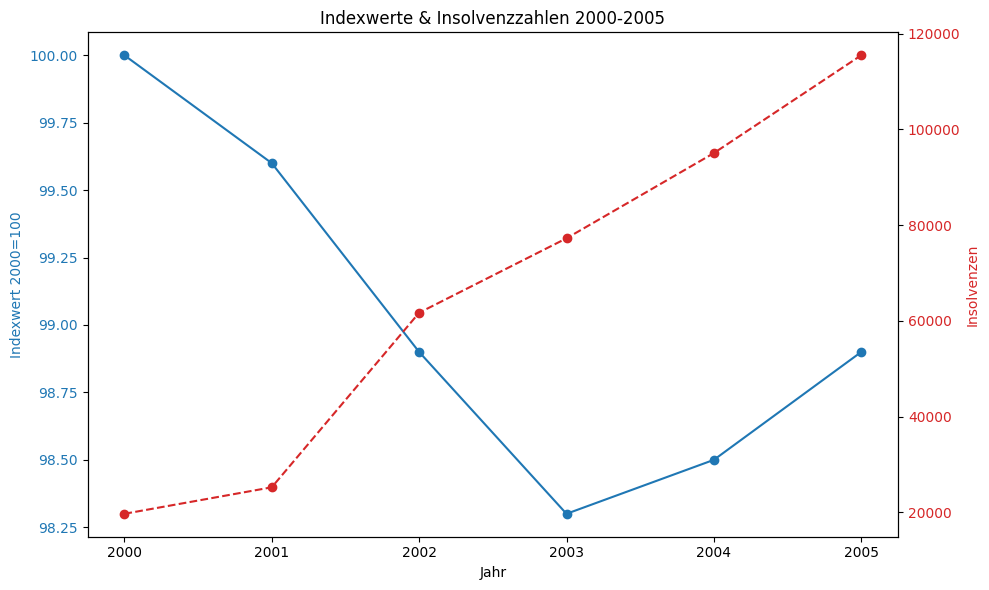

In [22]:
# Merge nach Jahr für den Zeitraum 2000-2005
merged_DotCom = pd.merge(houses_yearly_clean, insolvenzen_plot, on='Jahr', how='inner')

# Nur Zeitraum 2000-2005 filtern
merged_DotCom = merged_DotCom[(merged_DotCom['Jahr'] >= 2000) & (merged_DotCom['Jahr'] <= 2005)]

# Sortieren nach Jahr
merged_DotCom.sort_values('Jahr', inplace=True)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Linke Achse: Indexwerte
color = 'tab:blue'
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Indexwert 2000=100', color=color)
ax1.plot(merged_DotCom['Jahr'], merged_DotCom['Index'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Rechte Achse: Insolvenzen
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Insolvenzen', color=color)
ax2.plot(merged_DotCom['Jahr'], merged_DotCom['Insolvenzen'], marker='o', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Titel
plt.title('Indexwerte & Insolvenzzahlen 2000-2005')
plt.tight_layout()
plt.show()

### Finanzkrise

In [3]:
df_housePurc = pd.read_excel("RWIGEOREDX_HouPurc_v14_1_PUF.xlsx", sheet_name = "Grids_TimeEff_yearly")
print(df_housePurc.columns)
df_housePurc.head(5)

Index(['year', 'timeeff', 'timeeff_p025', 'timeeff_p975'], dtype='object')


,year,timeeff,timeeff_p025,timeeff_p975
0,2008,0.000000,0.000000,0.000000
1,2009,-3.560381,-3.679555,-3.441207
2,2010,-2.096044,-2.223673,-1.968414
3,2011,-0.673711,-0.804811,-0.542610
4,2012,1.714471,1.572476,1.856467


In [4]:
# Tabellen extrahieren
tables = cml.read_pdf("Insolvenzdaten.pdf", pages="1,2")  # oder "all"

# alle Tabellen in Pandas
insolvenzen = pd.concat([t.df for t in tables], ignore_index=True)

# Alles zu String machen, führende und nachgestellte Leerzeichen entfernen
insolvenzen = insolvenzen.applymap(lambda x: str(x).strip())

# Entferne Zeilen, bei denen "Jahr" nicht aus Ziffern besteht
insolvenzen = insolvenzen[insolvenzen[0].str.isdigit()]

# Nur Ziffern und evtl. Minuszeichen/Komma zulassen
insolvenzen[1] = (
    insolvenzen[1]
    .str.replace(r"[^\d,.-]", "", regex=True)  # Sonderzeichen raus
    .str.replace(",", ".", regex=False)        # Komma zu Punkt
)

# In Float umwandeln
insolvenzen[1] = pd.to_numeric(insolvenzen[1], errors="coerce")

print(insolvenzen.describe())

                   1
count      35.000000
mean    78476.628571
std     54914.196590
min      3214.000000
25%     10609.000000
50%     97416.000000
75%    119539.000000
max    153549.000000


/var/folders/2h/jms8nh8d5pq14k8390d1zrtm0000gn/T/ipykernel_3242/820211033.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  insolvenzen = insolvenzen.applymap(lambda x: str(x).strip())


/var/folders/2h/jms8nh8d5pq14k8390d1zrtm0000gn/T/ipykernel_3242/4169713297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housePurc_plot.rename(columns={'timeeff': 'Indexwert'}, inplace=True)


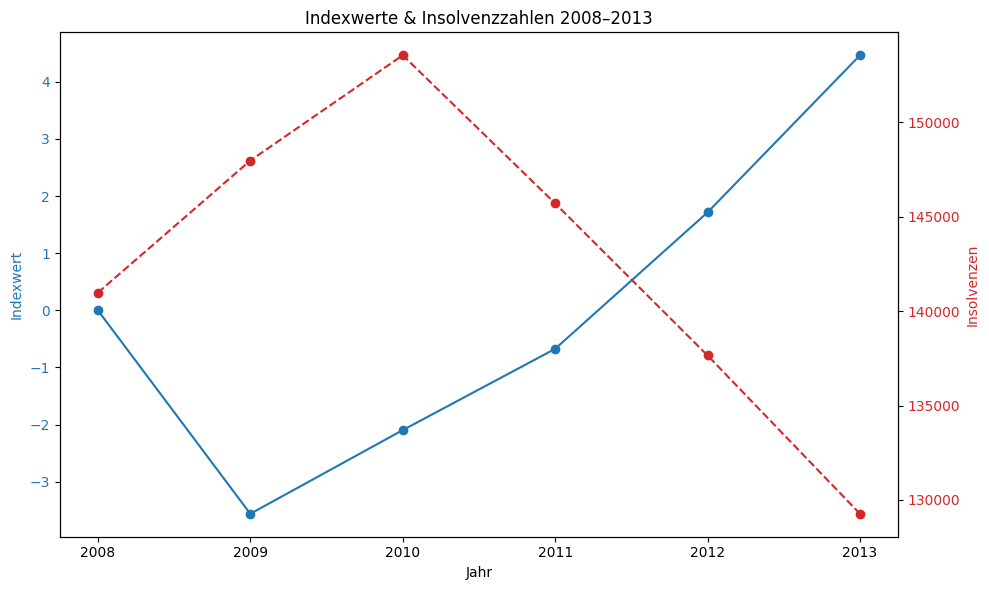

In [26]:
#Jahr-Spalten in Integer umwandeln
insolvenzen[0] = insolvenzen[0].astype(int)  # Jahr
df_housePurc['Jahr'] = df_housePurc['year'].astype(int)  

#Nur die relevanten Spalten für den Plot
df_housePurc_plot = df_housePurc[['Jahr', 'timeeff']]  # timeeff = Indexwert
df_housePurc_plot.rename(columns={'timeeff': 'Indexwert'}, inplace=True)

#Insolvenzdaten passend benennen
insolvenzen_plot = insolvenzen[[0, 1]].copy()
insolvenzen_plot.columns = ['Jahr', 'Insolvenzen']

#Merge nach Jahr
merged = pd.merge(df_housePurc_plot, insolvenzen_plot, on='Jahr', how='inner')
#filtern nach 2008-2013
merged = merged[(merged['Jahr'] >= 2008) & (merged['Jahr'] <= 2013)]

#Sortieren nach Jahr
merged.sort_values('Jahr', inplace=True)

#Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

#Linke Achse: Indexwerte
color = 'tab:blue'
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Indexwert', color=color)
ax1.plot(merged['Jahr'], merged['Indexwert'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Rechte Achse: Insolvenzen
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Insolvenzen', color=color)
ax2.plot(merged['Jahr'], merged['Insolvenzen'], marker='o', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Titel
plt.title('Indexwerte & Insolvenzzahlen 2008–2013')
plt.tight_layout()
plt.show()

### Corona-Krise

/var/folders/2h/jms8nh8d5pq14k8390d1zrtm0000gn/T/ipykernel_3242/2246050131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housePurc_plot.rename(columns={'timeeff': 'Indexwert'}, inplace=True)


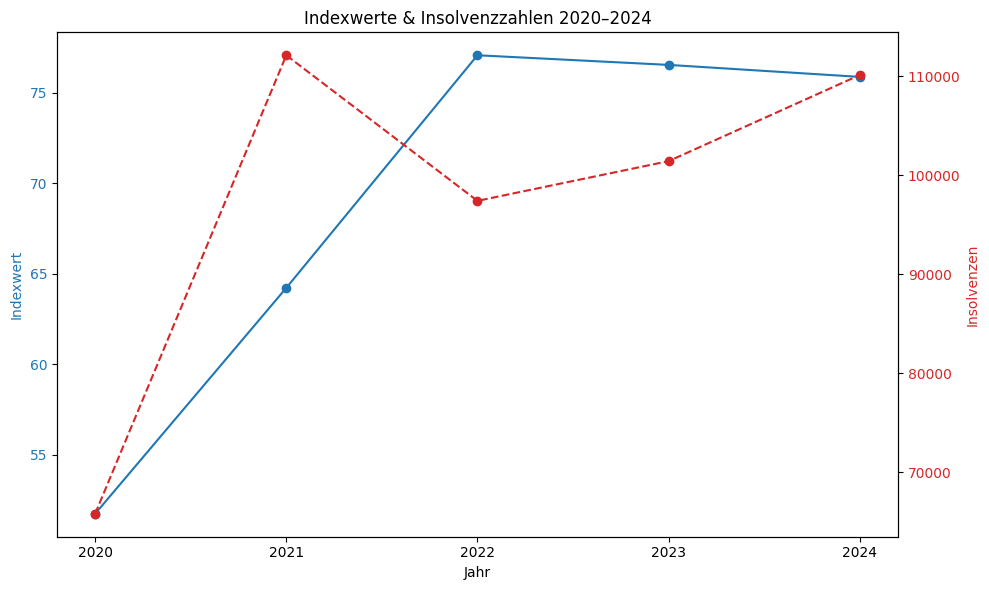

In [28]:
#Jahr-Spalten in Integer umwandeln
insolvenzen[0] = insolvenzen[0].astype(int)  # Jahr
df_housePurc['Jahr'] = df_housePurc['year'].astype(int)  

#Nur die relevanten Spalten für den Plot
df_housePurc_plot = df_housePurc[['Jahr', 'timeeff']]  # timeeff = Indexwert
df_housePurc_plot.rename(columns={'timeeff': 'Indexwert'}, inplace=True)

#Insolvenzdaten passend benennen
insolvenzen_plot = insolvenzen[[0, 1]].copy()
insolvenzen_plot.columns = ['Jahr', 'Insolvenzen']

#Merge nach Jahr
merged = pd.merge(df_housePurc_plot, insolvenzen_plot, on='Jahr', how='inner')
#filtern nach 2008-2013
merged = merged[(merged['Jahr'] >= 2020)]

#Sortieren nach Jahr
merged.sort_values('Jahr', inplace=True)

#Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

#Linke Achse: Indexwerte
color = 'tab:blue'
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Indexwert', color=color)
ax1.plot(merged['Jahr'], merged['Indexwert'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(merged['Jahr'].unique()) #entfernt Halbjahreszahlen

#Rechte Achse: Insolvenzen
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Insolvenzen', color=color)
ax2.plot(merged['Jahr'], merged['Insolvenzen'], marker='o', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Titel
plt.title('Indexwerte & Insolvenzzahlen 2020–2024')
plt.tight_layout()
plt.show()